# Heart Failure Predicting model - Classification Problem

About dataset:

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worlwide.
Heart failure is a common event caused by CVDs and this dataset contains 12 features that can be used to predict mortality by heart failure.

Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.

People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

Problem statement:
Create a model for predicting mortality caused by Heart Failure.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


*#binary cols meaning:

Sex - Gender of patient Male = 1, Female =0
Diabetes - 0 = No, 1 = Yes
Anaemia - 0 = No, 1 = Yes
High_blood_pressure - 0 = No, 1 = Yes
Smoking - 0 = No, 1 = Yes
DEATH_EVENT - 0 = No, 1 = Yes

In [3]:
#The dataset contains 299 rows and 13 cols.
#Our goal is to build a model which will predict (death_event) based on other inputs.
#1. death_event = output or dependent variable
#2. Others are inputs or independent variables

#Since death_event holds binary type of data, it is a classification problem.

In [4]:
#EDA
df.info()    #check for missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


In [6]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [7]:
#Checking output col count.
df['DEATH_EVENT'].value_counts()              #0: NO, 1: YES

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

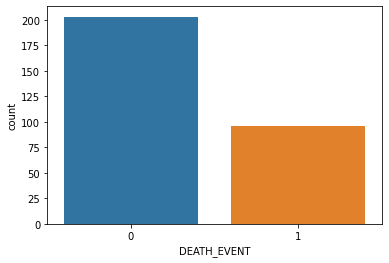

In [8]:
#y (or) dependent variable = DEATH_EVENT
sns.countplot(x="DEATH_EVENT",data=df)

In [9]:
#Since this is an imbalanced dataset, we will work on improving 
       #precision or recall score.
    
# In this case we will improve Recall score, as:
# Recall = TP/(TP+FN)
# We want to know correct positive predictions out of all positive predictions.

<AxesSubplot:xlabel='age'>

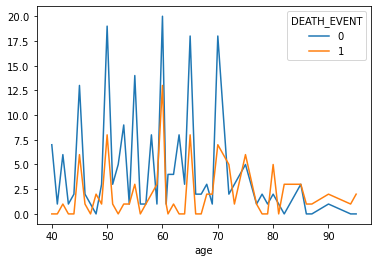

In [10]:
#using crosstab to relation b/w 2 variables at once.

pd.crosstab(df.age, df.DEATH_EVENT).plot(kind='line')

In [11]:
#We can clearly see that the death rates due to heart failure are more from 45 years.
#Highest in case age lies around sixtie. 
#(50-70)age group is also alarming.


In [12]:
pd.crosstab(df.anaemia,df.DEATH_EVENT)

DEATH_EVENT,0,1
anaemia,,
0,120,50
1,83,46


In [13]:
# No Anemia and No Death = 120
# Anemia and NO death = 83

# No Anemia and death = 50
# Anemia and death = 46

#We can say that if there is no anemia, the chances of death event will be lesser.

<AxesSubplot:xlabel='anaemia'>

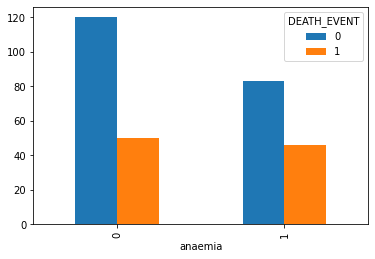

In [14]:
pd.crosstab(df.anaemia,df.DEATH_EVENT).plot(kind='bar')

In [15]:
pd.crosstab(df.diabetes,df.DEATH_EVENT)

DEATH_EVENT,0,1
diabetes,,
0,118,56
1,85,40


In [16]:
#No diabetes and No Death = 118
#No diabetes, chance of death is less.

<AxesSubplot:xlabel='diabetes'>

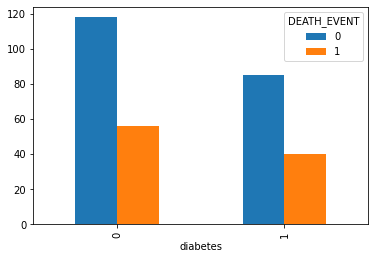

In [17]:
pd.crosstab(df.diabetes,df.DEATH_EVENT).plot(kind='bar')

# Model Building

Steps:
    1. Seperate x and y cols
    2. Import libraries required for preprocessing and building model
    3. Split data into training and testing data
    4. Fitting & training data.
    5. Checking the predictions.
    6. Seeing recall score for both train and test data.
    7. Improving recall score using various models.
    8. Finally using the best model which has highest recall score.

In [18]:
#Seperation of x and y cols.

x=df.loc[:,df.columns!="DEATH_EVENT"]
y=df.loc[:,"DEATH_EVENT"]

In [19]:
x.head()   # x = All independent variables

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [20]:
y.head()  # y = dependent variable (DEATH_EVENT) here.

0    1
1    1
2    1
3    1
4    1
Name: DEATH_EVENT, dtype: int64

In [21]:
#Importing needed libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [22]:
#Splitting data into training and testing part.
#80% training and 20% testing.

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=23)

In [23]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
285,55.0,1,170,1,40,0,336000.00,1.20,135,1,0,250
28,58.0,1,60,0,38,0,153000.00,5.80,134,1,0,26
157,50.0,0,250,0,25,0,262000.00,1.00,136,1,1,120
63,45.0,0,582,0,35,0,385000.00,1.00,145,1,0,61
239,55.0,1,180,0,45,0,263358.03,1.18,137,1,1,211
...,...,...,...,...,...,...,...,...,...,...,...,...
237,70.0,0,232,0,30,0,173000.00,1.20,132,1,0,210
31,85.0,0,23,0,45,0,360000.00,3.00,132,1,0,28
40,70.0,0,582,0,20,1,263358.03,1.83,134,1,1,31
230,60.0,0,166,0,30,0,62000.00,1.70,127,0,0,207


In [24]:
#We can that out of 299 rows we had originally:
# 239 goes for training.
# 60 for testing.

In [25]:
x_train.shape

(239, 12)

In [26]:
y_train

285    0
28     1
157    0
63     1
239    0
      ..
237    0
31     1
40     1
230    1
83     0
Name: DEATH_EVENT, Length: 239, dtype: int64

In [27]:
y_train.shape

(239,)

In [28]:
#Fitting model 

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
#Predictions
y_pred=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [30]:
y_pred

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [31]:
y_pred_test

array([0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0])

In [32]:
#Checking recall score, we import metric required.
from sklearn.metrics import recall_score

In [33]:
score=recall_score(y_train,y_pred)   #on traininf data
score

0.6794871794871795

In [34]:
score_pred_test=recall_score(y_test,y_pred_test)
score_pred_test

0.5555555555555556

In [35]:
#Our model is not so good for training data and is very bad for testing data.
#Needs to be improved.


In [36]:
#Lets use Decision Tree to build a new model and check if recall score is better.

In [37]:
#Import Decision Tree related libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [38]:
#Training and fitting Decision Tree model.

clf=DecisionTreeClassifier(max_depth=5,random_state=23)
clf_tree=clf.fit(x_train,y_train)

In [39]:
#To visualise our decision tree

import graphviz

In [40]:
#Create a dot_file, give our model name and feature names correctly.

from sklearn.tree import export_graphviz
dot_file=export_graphviz(clf_tree,feature_names=x_train.columns)

In [41]:
#To visualise the dot_file

from IPython.display import Image

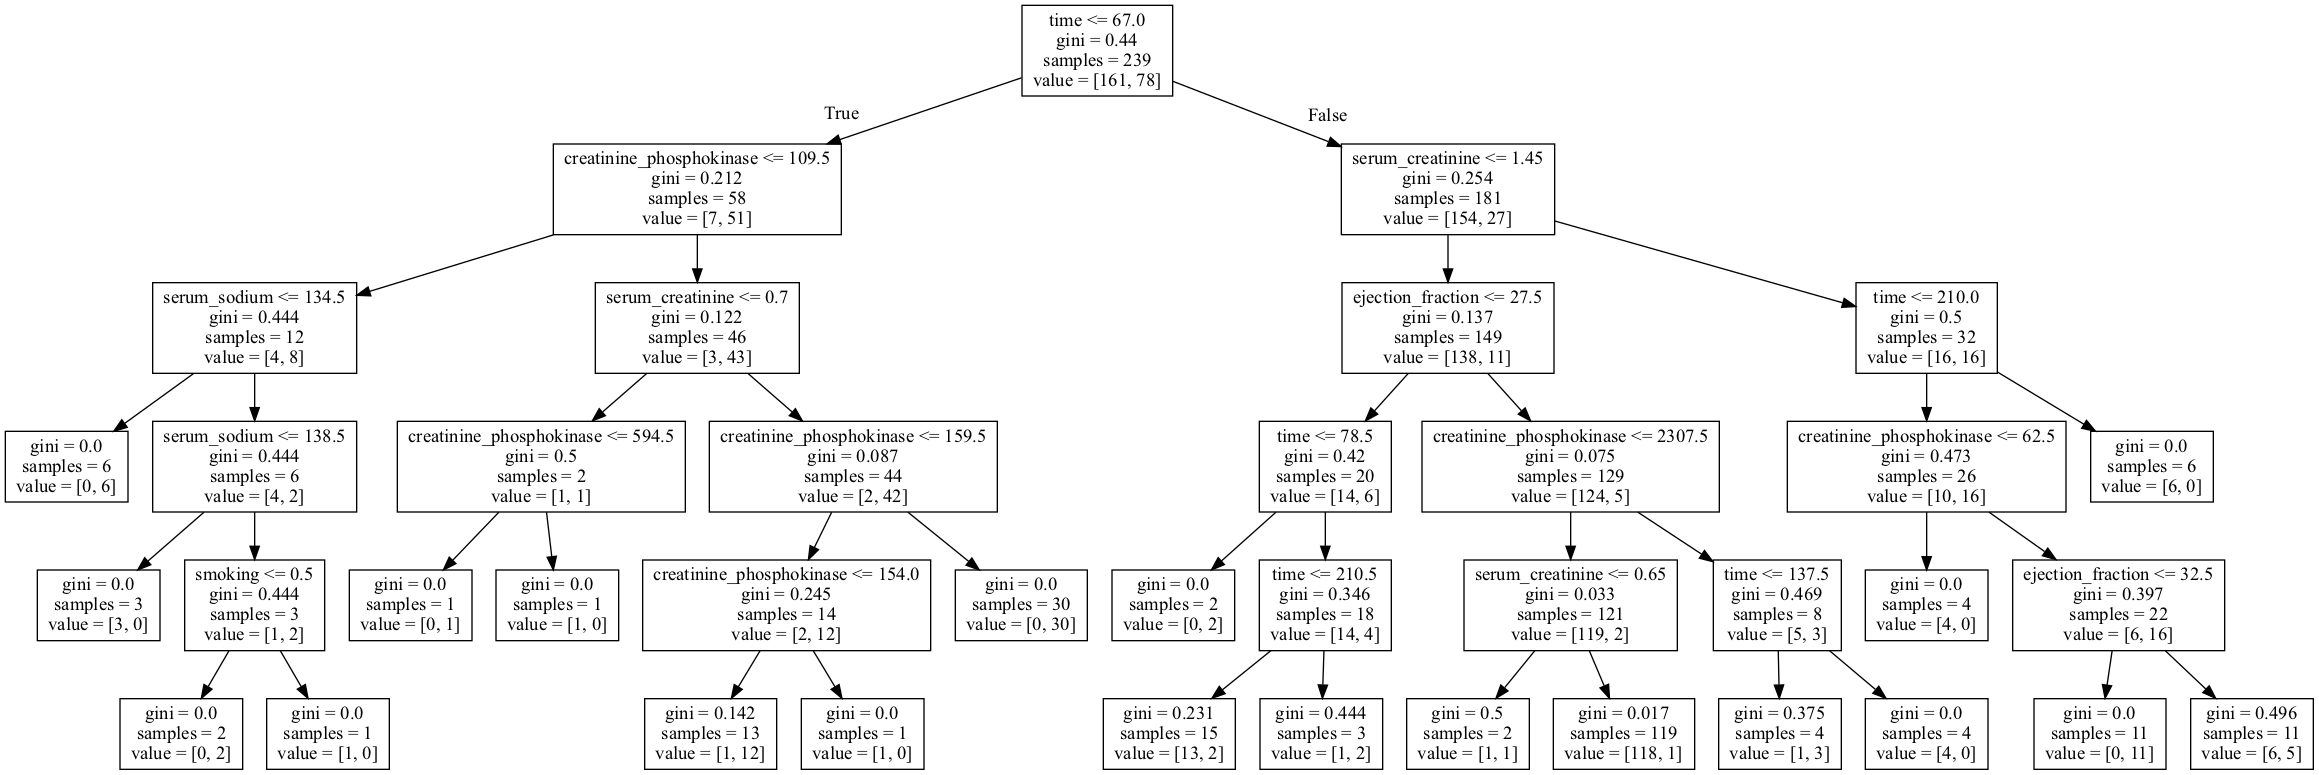

In [42]:
#use graph_from_dot_data() which is imported from pydotplus 
#give dot_file as parameter

import pydotplus
graph=pydotplus.graph_from_dot_data(dot_file)
Image(graph.create_png())

In [43]:
#Checking recall score on training data
clf_tree_recall=recall_score(y_train,clf_tree.predict(x_train))
clf_tree_recall

0.8846153846153846

In [44]:
#Recall score on testing data
clf_tree_test_recall=recall_score(y_test,clf_tree.predict(x_test))
clf_tree_test_recall

0.6111111111111112

In [45]:
#We can clearly see that our model has improved from earlier,
#overfitting model : model performs well on training data,
                    #but does not perform well for testing data.   

#We can further improve our model on testing data as that is most important.

# Random Forest

In [46]:
#ensemble is a combination of models like bagging, randomforest etcc...
#we want random forest classifier, as we are doing classification problem.
#In bagging, there is no replacement of sample.(no bootstrapping)
#In random forest every decision tree, will get random input variables 
#with bootstrapping.(with replacement of samples)


from sklearn.ensemble import RandomForestClassifier

In [47]:
#import random forest classifier

#n_estimatiors= no. of decision trees u want.

rf_clf=RandomForestClassifier(n_estimators=10)

In [48]:
#Fitting the model
rf_clf.fit(x_train,y_train)        #fit

RandomForestClassifier(n_estimators=10)

In [49]:
#recall score on training data
recall_score(y_train,rf_clf.predict(x_train))

1.0

In [50]:
#recall score on testing data
recall_score(y_test,rf_clf.predict(x_test))   

0.6666666666666666

In [51]:
#We can see further improvement in the recall score.
#It is working very well on training data and is much better on testing data.

#But still there is overfitting problem.

In [52]:
#Earlier with decision tree we tuned few parameters like:
               #max_depth, min sample split, min leaf split etc...
#here we can even hypertune no of trees, i.e; n_estimators.

#Earlier we created a new model everytime we did any hypertuning.
#So, what if we have a better way to check 
                        #all hyperparamaters we tune, giving their ranges.
#It is a lot beneficial to us as u need not write code so many times.
#The way to do is (Gridsearch)

In [53]:
#Grid search CV (cross validation: "training data" is split into train & test)
#Grid search CV is in sklearn model selection

from sklearn.model_selection import GridSearchCV

In [54]:
rf_clf1=RandomForestClassifier(n_estimators=100)

In [55]:
#create a dictionary for parameter range i want to try for grid search
#ANOTHER Paramter in Randomforest that can be tuned,
#max_feature: no of random input var u want per DT, 
                   #default is sqrt of n varaibles u hv in dataset.

#say u hv 9 variables, so default it will consider 3 random variables for every DT.
#you can put your own ranges u want to try with.
#so i create a dictionary and then fit model to this, 
                   #then check the best parameter range.
                   #check suggested search for parameters given by statisticians
param_grid={"n_estimators":[200,250,300],      #more than 250 is decent
            "min_samples_split":[2,4,10,14],     #based on data
            "max_features":[4,5,6,7,9]}          #based on data

In [56]:
#Now i use GridSearch object,
  #give details like 1. model name, 2. my dictionary (param_grid), 
  #3.cv(cross validation),
  #4.scoring: u get a score once code is run, we want recall score here.

grid_search=GridSearchCV(rf_clf1,param_grid,cv=5,scoring="recall")

In [57]:
grid_search.fit(x_train,y_train)   #fitting model

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': [4, 5, 6, 7, 9],
                         'min_samples_split': [2, 4, 10, 14],
                         'n_estimators': [200, 250, 300]},
             scoring='recall')

In [58]:
#find best parameter after fitting model: 
#i have tried multiple parameters as i dont know correct range.
#grid_search.best_params_ does accuracy for all models
 #and gives the model with highest accuracy score.


grid_search.best_params_

{'max_features': 7, 'min_samples_split': 4, 'n_estimators': 200}

In [59]:
#Now make your final model using this abv range for parameters

final_model=grid_search.best_estimator_

In [60]:
#recall score on training data
recall_score(y_train,final_model.predict(x_train))

0.9871794871794872

In [61]:
#recall on testing data
recall_score(y_test,final_model.predict(x_test))

0.7222222222222222

In [62]:
#The recall score remains same as earlier.
#To improve it we can further hypertune parameters.